# 🧑‍🏫 Task 1 Part 1: Building a Spam Classifier with Naive Bayes
In this exercise, you'll implement a spam classifier using the **Naive Bayes algorithm** . You'll work with email data to classify messages as spam or non-spam (ham). Follow the steps below and fill in the code where indicated.

**Objective:** Implement all key components of an ML pipeline (except for data handling).

**Allowed Libraries:** `pandas`, `numpy`

**Not Allowed:** Any pre-built ML algorithms or functions like those from `sklearn`.

Follow the instructions step-by-step and answer the questions!

## Step 1: Data Loading and Preprocessing
First, let's load and examine our data.

In [7]:
# Load the data
import pandas as pd

# TODO: Load the 'emails.csv' file into a DataFrame called 'emails'
emails = pd.read_csv('emails.csv')

In [9]:
# Display the first few rows
print(emails.head())

# HINT: Use pd.read_csv() to load the data
# HINT: The DataFrame should have 'text' and 'spam' columns

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Missing values in each column:
text    0
spam    0
dtype: int64

Shape of data after removing missing values:
Original shape: (5728, 2)
New shape: (5728, 2)


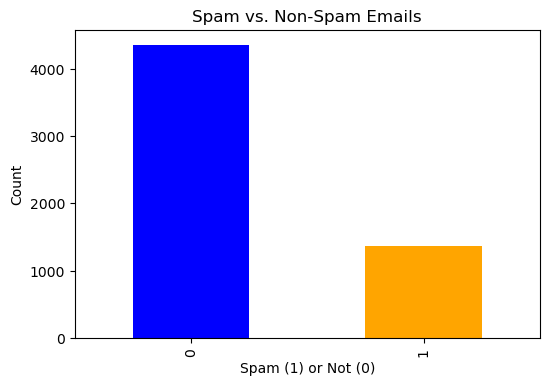


Data is ready for modeling!
Training set shape: (4582, 37441)
Testing set shape: (1146, 37441)


In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(emails.isnull().sum())

# Remove rows with missing values
emails_cleaned = emails.dropna()

print("\nShape of data after removing missing values:")
print("Original shape:", emails.shape)
print("New shape:", emails_cleaned.shape)

# Visualize the distribution of the 'spam' column
plt.figure(figsize=(6, 4))
emails_cleaned['spam'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Spam vs. Non-Spam Emails")
plt.xlabel("Spam (1) or Not (0)")
plt.ylabel("Count")
plt.show()

# Text tokenization: Convert the text data into a simple bag-of-words format
def tokenize(text):
    words = text.lower().split()  # Convert to lowercase and split by whitespace
    return words

# Build vocabulary and transform text data to bag-of-words
def build_bow(text_data):
    vocabulary = {}
    bow_data = []
    
    for text in text_data:
        words = tokenize(text)
        word_counts = {}
        
        for word in words:
            if word not in vocabulary:
                vocabulary[word] = len(vocabulary)  # Assign a new index to each unique word
            
            word_index = vocabulary[word]
            word_counts[word_index] = word_counts.get(word_index, 0) + 1
        
        bow_data.append(word_counts)  # Append the word count dictionary for each email
    
    return vocabulary, bow_data

# Apply bag-of-words transformation
vocabulary, bow_data = build_bow(emails_cleaned['text'])

# Convert bag-of-words format to a matrix
def bow_to_matrix(bow_data, vocab_size):
    matrix = np.zeros((len(bow_data), vocab_size))
    
    for i, word_counts in enumerate(bow_data):
        for word_index, count in word_counts.items():
            matrix[i, word_index] = count
            
    return matrix

# Create the feature matrix X and the target variable y
X = bow_to_matrix(bow_data, len(vocabulary))
y = emails_cleaned['spam'].values  # Assuming spam column is 0 (non-spam) or 1 (spam)

# Manual train-test split
def train_test_split_manual(X, y, test_size=0.2):
    indices = list(range(len(X)))
    random.shuffle(indices)
    split_idx = int(len(X) * (1 - test_size))
    
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)

print("\nData is ready for modeling!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


## Step 2: Text Preprocessing
We need to process each email to extract unique words.

In [47]:
def process_email(text):
    """
    Convert email text to a list of unique, lowercase words
    
    Parameters:
        text (str): The email text
    
    Returns:
        list: List of unique words in the email
    """
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Split text into words
    words = text.split()
    
    # 3. Remove duplicates by converting to a set, then back to a list
    unique_words = list(set(words))
    
    return unique_words


In [49]:
# Apply preprocessing to all emails
# Apply preprocessing to all emails
emails_cleaned['processed_text'] = emails_cleaned['text'].apply(process_email)

# Display the first few rows to verify
print(emails_cleaned[['text', 'processed_text']].head())


                                                text  \
0  Subject: naturally irresistible your corporate...   
1  Subject: the stock trading gunslinger  fanny i...   
2  Subject: unbelievable new homes made easy  im ...   
3  Subject: 4 color printing special  request add...   
4  Subject: do not have money , get software cds ...   

                                      processed_text  
0  [much, is, reflect, unlimited, fees, ieader, d...  
1  [and, the, hall, kansas, is, nameable, attire,...  
2  [and, the, of, is, loan, homeowner, 169, exten...  
3  [and, click, of, 8102, 8090, com, rd, printabl...  
4  [the, is, do, death, be, finish, ,, ended, me,...  


In [51]:
# Test your preprocessing by testing on the first email
# Get the first email's text
first_email_text = emails_cleaned['text'].iloc[0]

# Apply the preprocessing function to the first email
processed_first_email = process_email(first_email_text)

# Display the original and processed text
print("Original email text:\n", first_email_text)
print("\nProcessed email text:\n", processed_first_email)


Original email text:
 Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . aff

## Step 3: Calculate Prior Probabilities
Let's calculate the basic probability of an email being spam.

In [54]:
# TODO: Calculate the following:
# 1. Total number of emails
# 2. Number of spam emails
# 3. Probability of spam


num_emails = len(emails_cleaned)
num_spam = sum(emails_cleaned['spam'])
spam_probability =num_spam / num_emails

print(f"Number of emails: {num_emails}")
print(f"Number of spam emails: {num_spam}")
print(f"Probability of spam: {spam_probability:.4f}")

# HINT: Use len(emails) for total count
# HINT: Use sum(emails['spam']) for spam count

Number of emails: 5728
Number of spam emails: 1368
Probability of spam: 0.2388


## Step 4: Training the Model
Now we'll build our Naive Bayes model by counting word occurrences in spam and ham emails.

In [59]:
def train_naive_bayes(emails_data):
    """
    Train a Naive Bayes model on email data
    
    Parameters:
        emails_data (DataFrame): DataFrame with 'words' and 'spam' columns
    
    Returns:
        dict: Dictionary with word frequencies in spam and ham emails
    """
    # TODO: Create a dictionary to store word frequencies
    # For each word, store counts of its occurrence in spam and ham emails
    model = {}
    
    
    # Separate spam and ham emails
    spam_emails = emails_data[emails_data['spam'] == 1]
    ham_emails = emails_data[emails_data['spam'] == 0]

    # Process and count occurrences of each word in spam emails
    for _, email in spam_emails.iterrows():
        words = process_email(email['text'])  # Process the text directly here
        for word in words:
            if word not in model:
                model[word] = {'spam': 1, 'ham': 1}  # Initialize counts with 1 (Laplace smoothing)
            model[word]['spam'] += 1

    # Process and count occurrences of each word in ham emails
    for _, email in ham_emails.iterrows():
        words = process_email(email['text'])  # Process the text directly here
        for word in words:
            if word not in model:
                model[word] = {'spam': 1, 'ham': 1}  # Initialize counts with 1 (Laplace smoothing)
            model[word]['ham'] += 1


    # HINT: Initialize counts with 1 (Laplace smoothing)
    # HINT: Structure: model[word] = {'spam': count, 'ham': count}

    return model



In [61]:
model = train_naive_bayes(emails)

In [63]:
# Test your model with some words
# Examples: 'lottery', 'sale', 'meeting'
def test_word_frequencies(model, words):
    """
    Test the model by printing the spam and ham frequencies of specified words
    
    Parameters:
        model (dict): The trained Naive Bayes model with word frequencies
        words (list): List of words to test
    """
    for word in words:
        if word in model:
            spam_count = model[word]['spam']
            ham_count = model[word]['ham']
            print(f"Word: '{word}'\n  Spam Count: {spam_count}\n  Ham Count: {ham_count}\n")
        else:
            print(f"Word: '{word}' not found in model.\n")

# Example words to test
test_words = ['lottery', 'sale', 'meeting']

# Test the model with these words
test_word_frequencies(model, test_words)



Word: 'lottery'
  Spam Count: 9
  Ham Count: 1

Word: 'sale'
  Spam Count: 39
  Ham Count: 42

Word: 'meeting'
  Spam Count: 11
  Ham Count: 808



## Step 5: Implementing the Prediction Function
Finally, let's implement the function to predict whether an email is spam.

In [65]:
def predict_naive_bayes(email_text, model, num_spam, num_ham):
    """
    Predict whether an email is spam using Naive Bayes
    
    Parameters:
        email_text (str): The text of the email to classify
        model (dict): Trained Naive Bayes model
        num_spam (int): Number of spam emails in training data
        num_ham (int): Number of ham emails in training data
    
    Returns:
        float: Probability that the email is spam
    """
    # TODO: Implement the Naive Bayes prediction
    # 1. Preprocess the email text
    # 2. Calculate probability using the Naive Bayes formula

     # Preprocess the email text
    words = process_email(email_text)
    
    # Calculate prior probabilities
    total_emails = num_spam + num_ham
    prob_spam = num_spam / total_emails
    prob_ham = num_ham / total_emails
    
    # Initialize log probabilities
    log_prob_spam = math.log(prob_spam)
    log_prob_ham = math.log(prob_ham)
    
    # Calculate likelihood for each word in the email
    for word in words:
        if word in model:
            spam_count = model[word]['spam']
            ham_count = model[word]['ham']
            
            # Laplace smoothing
            total_spam_words = sum([model[w]['spam'] for w in model])
            total_ham_words = sum([model[w]['ham'] for w in model])
            
            # Likelihood calculations with Laplace smoothing
            prob_word_given_spam = (spam_count + 1) / (total_spam_words + len(model))
            prob_word_given_ham = (ham_count + 1) / (total_ham_words + len(model))
            
            # Update log probabilities
            log_prob_spam += math.log(prob_word_given_spam)
            log_prob_ham += math.log(prob_word_given_ham)
        else:
            # If the word is not in the model, use Laplace smoothing
            log_prob_spam += math.log(1 / (total_spam_words + len(model)))
            log_prob_ham += math.log(1 / (total_ham_words + len(model)))

    # Calculate the final probability of being spam
    prob_spam_given_email = math.exp(log_prob_spam) / (math.exp(log_prob_spam) + math.exp(log_prob_ham))
    
    return prob_spam_given_email

    # HINT: Use the log of probabilities to avoid numerical underflow
    # HINT: Remember to handle words not in the training data
    

In [71]:
# Test your prediction function
test_emails = [
    "lottery winner claim prize money",
    "meeting tomorrow at 3pm",
    "buy cheap watches online"
]

for email_text in test_emails:
    spam_probability = predict_naive_bayes(email_text, model, spam, ham)
    print(f"Email: '{email_text}'")
    print(f"Probability that the email is spam: {spam_probability:.4f}\n")

NameError: name 'spam' is not defined

## Step 6: Wrap-up
1. How well did your model perform?
2. What challenges did you face while implementing it from scratch?
3. What improvements would you suggest for the future?

### Notes (if any):